In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [6]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [8]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

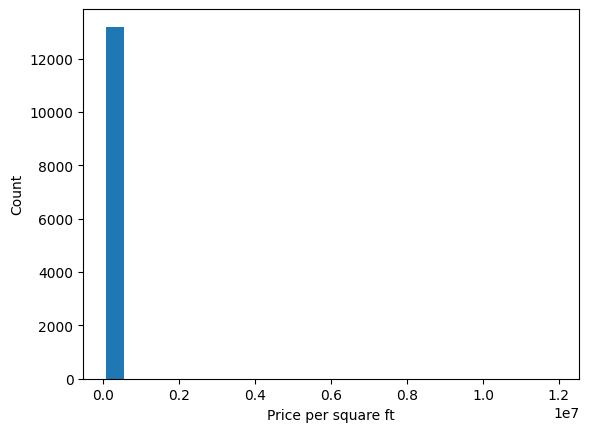

In [9]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

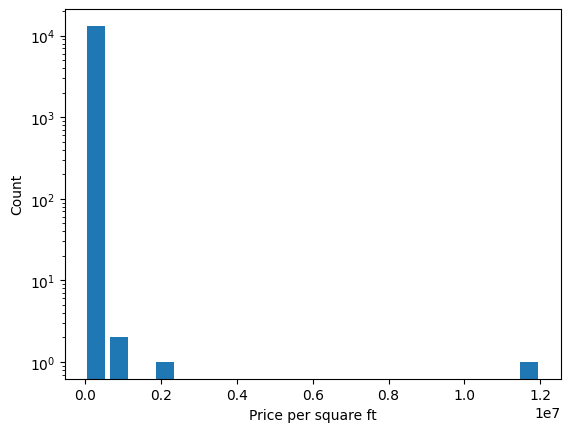

In [10]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()


PERCENTILE 

In [11]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [17]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
7575,other,1 BHK,425.0,1.0,750.0,1,176470
1005,other,1 BHK,15.0,1.0,30.0,1,200000
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
3934,other,1 BHK,1500.0,1.0,19.5,1,1300


In [18]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [19]:
df.shape

(13200, 7)

In [20]:
df.shape[0] - df2.shape[0]

28

Now remove outliers using 4 standard deviation

In [21]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(np.float64(23227.73653589432), np.float64(-9900.429065502582))

In [22]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1795,2nd Stage Nagarbhavi,5 Bedroom,1200.0,4.0,285.0,5,23750
2618,Malleshwaram,7 Bedroom,3000.0,4.0,900.0,7,30000
5144,Rajaji Nagar,3 Bedroom,2790.0,3.0,950.0,3,34050
8483,HSR Layout,8 Bedroom,800.0,8.0,285.0,8,35625
1078,other,4 Bedroom,2400.0,5.0,775.0,4,32291
5909,other,5 Bedroom,1240.0,5.0,300.0,5,24193
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
3136,other,4 Bedroom,1200.0,4.0,350.0,4,29166
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083


In [24]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [25]:
df2.shape[0]-df3.shape[0]

125

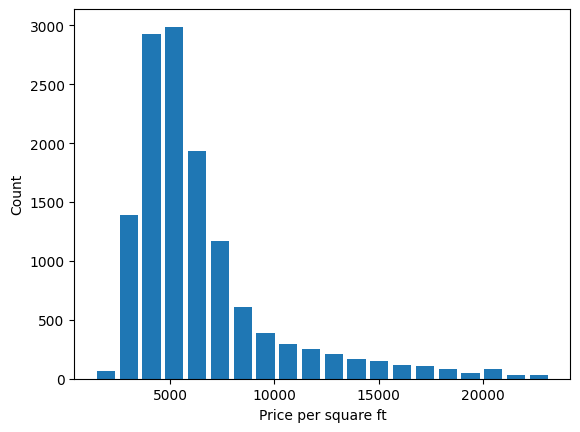

In [37]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

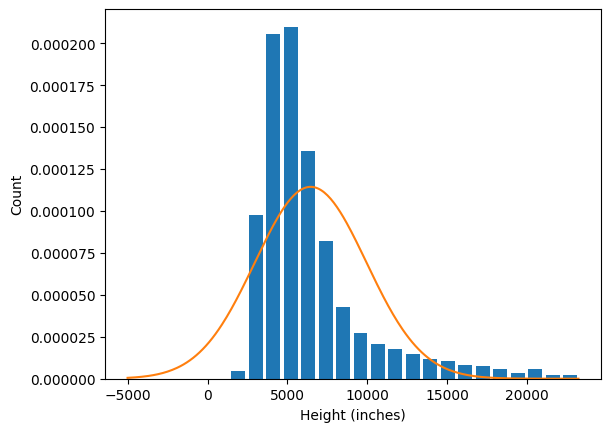

In [35]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000,df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [31]:
df3.price_per_sqft.mean(), df3.price_per_sqft.std()

(np.float64(6449.328044761248), np.float64(3487.6700047355785))

 Now remove outliers using z score. Use z score of 4 as your thresold

In [38]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\Yash\AppData\Local\Temp\ipykernel_23072\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5879,other,4 BHK,2250.0,4.0,400.00,4,17777,2.683721
10790,Thanisandra,3 BHK,2030.0,4.0,125.00,3,6157,-0.122350
11433,Electronics City Phase 1,3 BHK,1750.0,3.0,58.00,3,3314,-0.808896
8676,Kambipura,3 BHK,1083.0,2.0,48.00,3,4432,-0.538914
125,other,2 BHK,945.0,2.0,54.00,2,5714,-0.229328
11725,other,2 Bedroom,1200.0,2.0,82.00,2,6833,0.040895
5720,Hebbal,2 BHK,1250.0,2.0,55.55,2,4444,-0.536016
3404,Sector 2 HSR Layout,2 BHK,1143.0,2.0,65.00,2,5686,-0.236090
5711,Old Airport Road,4 BHK,2774.0,4.0,208.00,4,7498,0.201483
3370,other,3 BHK,1740.0,3.0,199.00,3,11436,1.152457


In [39]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [40]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

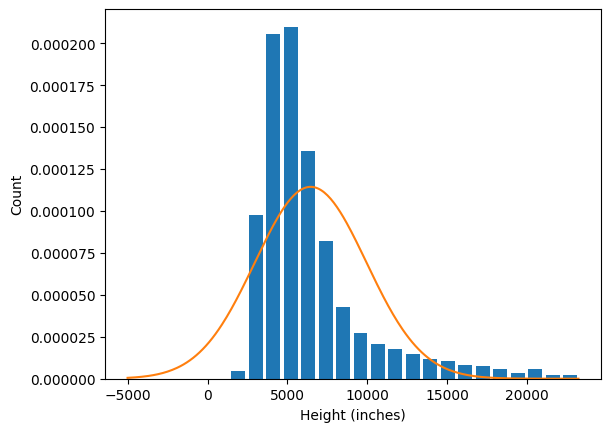

In [41]:
plt.hist(df4.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000,df4.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df4.price_per_sqft.mean(),df4.price_per_sqft.std()))

In [42]:
import seaborn as sns

In [43]:
df = pd.read_csv("heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [45]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='height', ylabel='Count'>

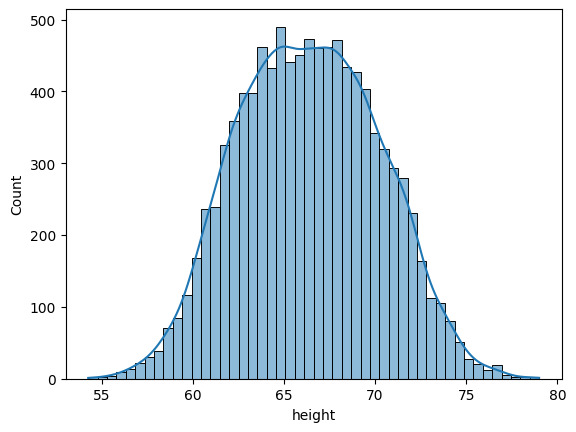

In [47]:
sns.histplot(df.height, kde=True)

In [48]:
mean = df.height.mean()
mean

np.float64(66.367559754866)

In [49]:
std_deviation = df.height.std()
std_deviation

np.float64(3.847528120795573)

In [51]:
mean-3*std_deviation

np.float64(54.824975392479274)

In [52]:
mean+3*std_deviation

np.float64(77.91014411725271)

In [53]:
df[(df.height < 54.82) | (df.height > 77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [54]:
df_no_outlier = df[(df.height<77.91) & (df.height>54.82)]
df_no_outlier.shape

(9993, 2)

In [55]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [56]:
df.height.mean()

np.float64(66.367559754866)

In [57]:
df.height.std()

np.float64(3.847528120795573)

In [59]:
print(df[df['zscore']>3])
print(df[df['zscore']<-3])

     gender     height    zscore
994    Male  78.095867  3.048271
1317   Male  78.462053  3.143445
2014   Male  78.998742  3.282934
3285   Male  78.528210  3.160640
3757   Male  78.621374  3.184854
      gender     height    zscore
6624  Female  54.616858 -3.054091
9285  Female  54.263133 -3.146027
